In [60]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

In [61]:
census = pd.read_csv('../data/combined_cleaned_encode.csv')
census.head()

,zipcode,total_crimes,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,crime rate,crime rating,crime encode
0,85746.0,29633.0,42704.0,31.8,41427.0,16176.0,10686.0,25.023417,0.693916,high,2.0
1,85706.0,38102.0,56989.0,27.5,29814.0,12164.0,20916.0,36.701820,0.668585,high,2.0
2,85756.0,8557.0,35522.0,31.8,46672.0,16574.0,5229.0,14.720455,0.240893,high,2.0
3,85747.0,4670.0,23490.0,34.5,81474.0,31039.0,1199.0,5.104300,0.198808,high,2.0
4,85748.0,2971.0,18275.0,45.4,69871.0,34353.0,1254.0,6.861833,0.162572,high,2.0


In [62]:
census.shape

(440, 11)

In [63]:
print(list(census.head(0)))

['zipcode', 'total_crimes', 'Population', 'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Count', 'Poverty Rate', 'crime rate', 'crime rating', 'crime encode']


In [64]:
for index, row in census.iterrows():
    if(row['crime rating'] == "high"):
        blah = 1
    elif(row['crime rating'] == 'medium'):
        blah = 0
    else:
        blah = -1
    census.at[index, 'encode'] = blah
census.head()

,zipcode,total_crimes,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,crime rate,crime rating,crime encode,encode
0,85746.0,29633.0,42704.0,31.8,41427.0,16176.0,10686.0,25.023417,0.693916,high,2.0,1.0
1,85706.0,38102.0,56989.0,27.5,29814.0,12164.0,20916.0,36.701820,0.668585,high,2.0,1.0
2,85756.0,8557.0,35522.0,31.8,46672.0,16574.0,5229.0,14.720455,0.240893,high,2.0,1.0
3,85747.0,4670.0,23490.0,34.5,81474.0,31039.0,1199.0,5.104300,0.198808,high,2.0,1.0
4,85748.0,2971.0,18275.0,45.4,69871.0,34353.0,1254.0,6.861833,0.162572,high,2.0,1.0


In [65]:
census[census["crime rating"]== "low"].count()

zipcode              145
total_crimes         145
Population           145
Median Age           145
Household Income     145
Per Capita Income    145
Poverty Count        145
Poverty Rate         145
crime rate           145
crime rating         145
crime encode         145
encode               145
dtype: int64

In [66]:
target = census["encode"]
target_names = ["Low","Medium", "High"]

In [67]:
#data = census.drop(["crime_rating", "encode"], axis=1)
data = census[["Poverty Rate", "crime rate"]]
data.head()

,Poverty Rate,crime rate
0,25.023417,0.693916
1,36.701820,0.668585
2,14.720455,0.240893
3,5.104300,0.198808
4,6.861833,0.162572


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [69]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.500


In [71]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

        Low       0.42      0.97      0.58        33
     Medium       0.33      0.03      0.05        35
       High       0.73      0.52      0.61        42

avg / total       0.51      0.50      0.42       110



In [72]:
X = np.array(census[["Poverty Rate", "crime rate"]])
y = np.array(census["encode"])


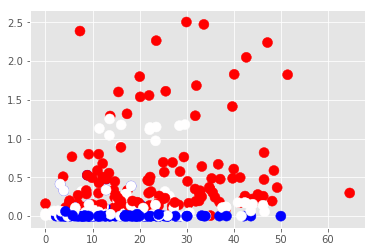

In [73]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [74]:
# WARNING! BOILERPLATE CODE HERE!
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
#plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

ValueError: cannot reshape array of size 585 into shape (65,3)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)


In [ ]:
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
predictions = grid.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))